## Витік

Спектральний витік — ефект спотворення спектру, що проявляється в тому, що частина енергії на одній частоті з’являється на іншій частоті (зазвичай поблизу).

Давайте подивимося на вплив витоку на синусоїдний сигнал (який містить лише одну частотну складову).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [2]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

Якщо тривалість є цілим числом, кратним періоду, початок і кінець сегмента збігаються, і ми отримуємо мінімальний витік.

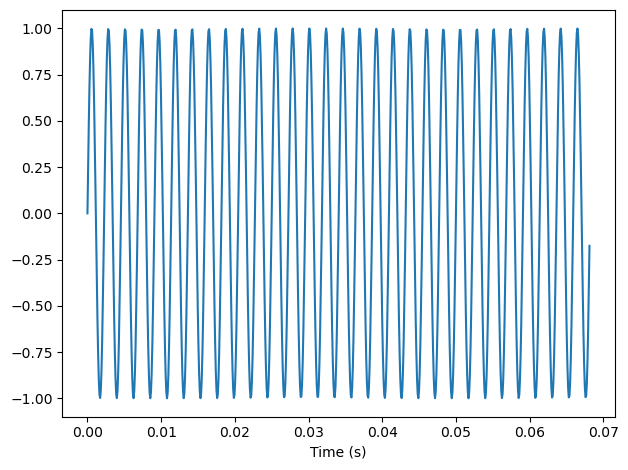

In [3]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

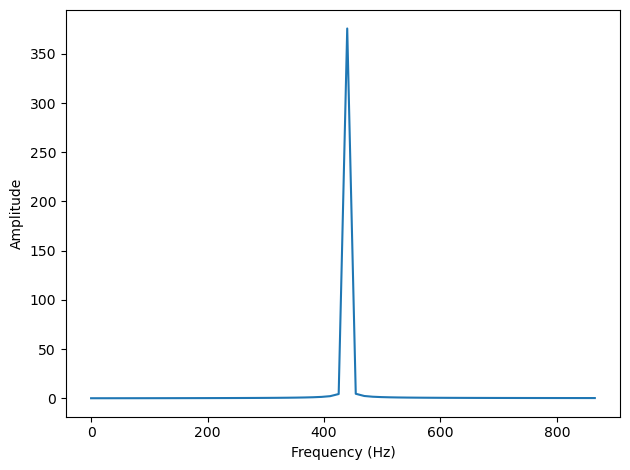

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Якщо тривалість не кратна періоду, витік досить поганий.

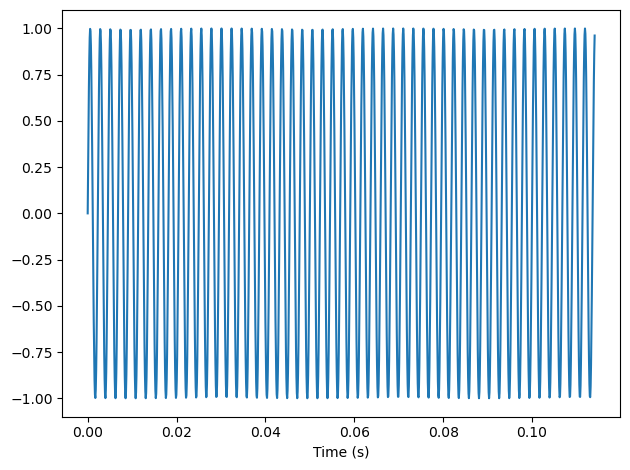

In [96]:
duration = signal.period * 50.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

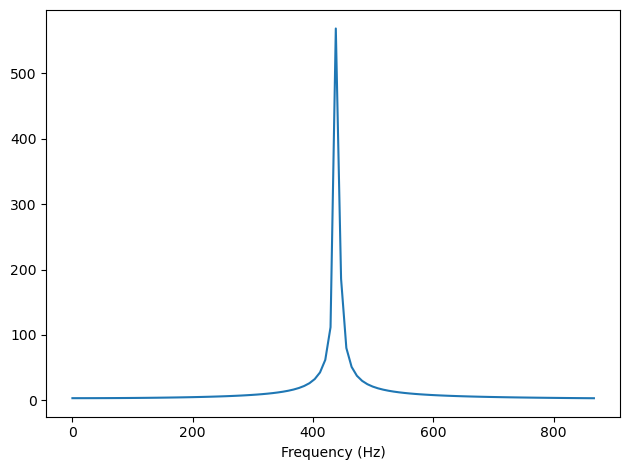

In [97]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Визначимо і застосуємо віконну функцію

In [98]:
def rect(npoints):
    win_func = np.ones(npoints)
    return win_func

In [99]:
def triangle(npoints):
    length_2 = npoints / 2
    npoints_2 = npoints / 2
    win_func = np.ones(npoints)
    for num in range(npoints) :
        win_func[num] = 1 - abs((num - npoints_2) / length_2)
    return win_func
    

In [100]:
def hann(npoints):
    win_func = np.ones(npoints)
    for num in range(npoints) :
        win_func[num] = np.sin(np.pi * num / npoints) ** 2
    return win_func

In [101]:
def hamming(npoints):
    win_func = np.ones(npoints)
    a_0 = 25/46
    a_1 = 1 - a_0
    two_pi = 2 * np.pi
    for num in range(npoints) :
        win_func[num] = a_0 - a_1 * np.cos(two_pi * num / npoints)
    return win_func

In [106]:
def flat_top(npoints):
    win_func = np.ones(npoints)
    a_0 = 0.21557895
    a_1 = 0.41663158
    a_2 = 0.277263158
    a_3 = 0.083578947
    a_4 = 0.006947358
    for num in range(npoints) :
        win_func[num] = a_0 - \
          a_1 * np.cos(2*np.pi * num / npoints) + \
          a_2 * np.cos(4*np.pi * num / npoints) - \
          a_3 * np.cos(6*np.pi * num / npoints) + \
          a_4 * np.cos(8*np.pi * num / npoints)
    return win_func

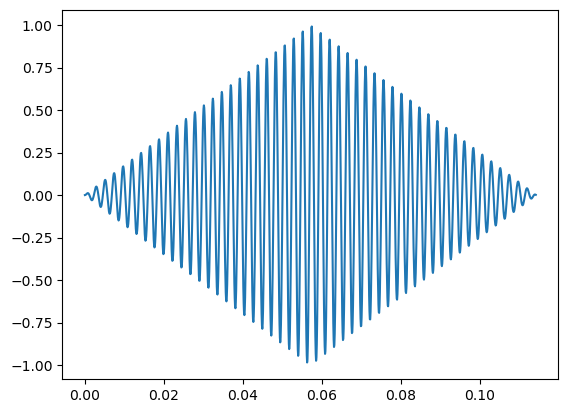

In [113]:
npoints = len(wave.ys)
# win_func = rect(npoints)
win_func = triangle(npoints)
# win_func = hann(npoints)
# win_func = hamming(npoints)
# win_func = flat_top(npoints)
wave_n = wave.copy()
wave_n.window(win_func)
wave_n.plot()

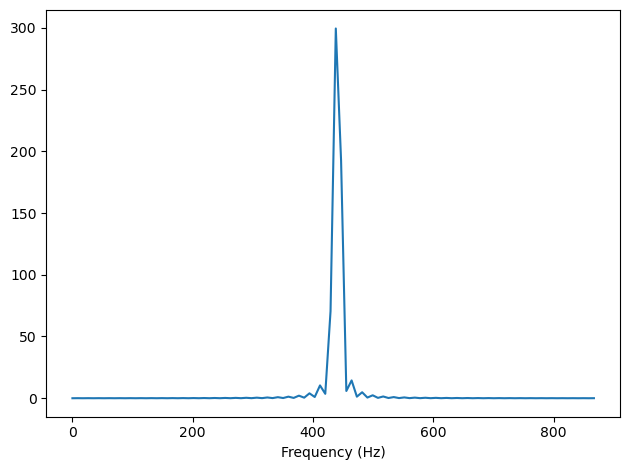

In [114]:
spectrum = wave_n.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')